# Sales Analysis

### Import Necessary Libraries

In [3]:
import pandas as pd
import os


### Task #1 Merge the 12 months of sales data into a single CSV file

In [76]:
# Import necessary libraries
import pandas as pd
import os

# Get list of files from specified directory
files = [file for file in os.listdir('F:/pp/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

# Initialize empty DataFrame to hold all the data
all_months_data = pd.DataFrame()

# Loop through each file and append its data to the all_months_data DataFrame
for file in files:
    # Read in the file as a pandas DataFrame
    df = pd.read_csv('F:/pp/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
    
    # Append the DataFrame to the all_months_data DataFrame
    all_months_data = pd.concat([all_months_data, df])
    
# Write the combined DataFrame to a CSV file without the index column
all_months_data.to_csv('all_data.csv', index = False)

### Read Updated dataframe

In [6]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the data

The first step in this is figuiring out thwat we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on error, you decide how you should go about cleaning the data

### Drop rows of NAN

In [7]:
# Find NAN

nan_df = all_data[all_data.isna().any(axis = 1)]
display(nan_df.head())

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Getting rid of text in order date columns

In [8]:
# Filter out any rows that contain invalid data in the 'Order Date' column
# The 'Order Date' column should contain dates in the format 'MM/DD/YYYY'
# However, there are some rows that contain the string 'Order Date' instead of a date
# These rows were added as headers in the original CSV files and were concatenated into the final DataFrame
# We want to remove these rows because they contain no useful information

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Making column the correct type(str to int/float)

In [9]:
# Convert the 'Quantity Ordered' and 'Price Each' columns to numeric data types
# These columns were read in as strings when the CSV files were read in as DataFrames
# However, we want to perform mathematical operations on these columns, so we need to convert them to numeric data types

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


## pd.to_numeric automatically detects the type and convery it 

## Augment Data with additional columns

### Adding month column

In [20]:
# Create a new column called 'Month' in the all_data DataFrame
# This column will contain the month that each order was made
# We extract the month from the 'Order Date' column, which has the format 'MM/DD/YYYY'
# To do this, we slice the first two characters from the 'Order Date' column and assign the result to the 'Month' column

all_data['Month'] = all_data['Order Date'].str[0:2]

# Convert the 'Month' column to an integer data type
# This is necessary because the 'Month' column was created as a string column
# We want to perform numerical operations on the 'Month' column, so we need to convert it to an integer data type

all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4


### Adding month column with different method

In [24]:
all_data ['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


In [26]:
# Droppng the extra month column

all_data = all_data.drop(['Month 2'], axis=1)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding City column

In [77]:
# Define two helper functions that will be used to extract city and state information from the 'Purchase Address' column
# These functions take a single argument, which is a string containing an address in the format 'Street, City, State Zipcode'
# The 'get_city' function extracts the city from the address by splitting the address string on the ',' character and returning the second item in the resulting list
# The 'get_state' function extracts the state from the address by splitting the address string on the ',' character, then splitting the third item in the resulting list on the ' ' character and returning the second item

def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# Create a new column called 'City' in the all_data DataFrame
# This column will contain the city and state information for each order, formatted as 'City (State)'
# To create this column, we apply a lambda function to the 'Purchase Address' column that calls the 'get_city' and 'get_state' functions and formats the result as 'City (State)'

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,4,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,9,27


# Data Exploration!

### Question 1 - What was the best month for sales? How much was earned that month?

In [22]:
# Create a new column called 'Sales' in the all_data DataFrame
# This column will contain the total sales for each order
# To calculate the total sales, we multiply the 'Quantity Ordered' column (which contains the number of items ordered) by the 'Price Each' column (which contains the price of each item)
# We convert the 'Quantity Ordered' column to an integer data type and the 'Price Each' column to a float data type before performing the multiplication

all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4


In [23]:
all_data.groupby('Month').sum(numeric_only = True)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


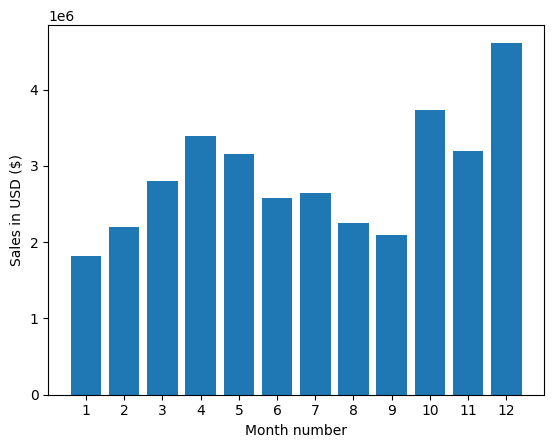

In [24]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum(numeric_only = True)['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2 - What city sold the most product?

In [25]:
results = all_data.groupby(['City']).sum(numeric_only = True)

results

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


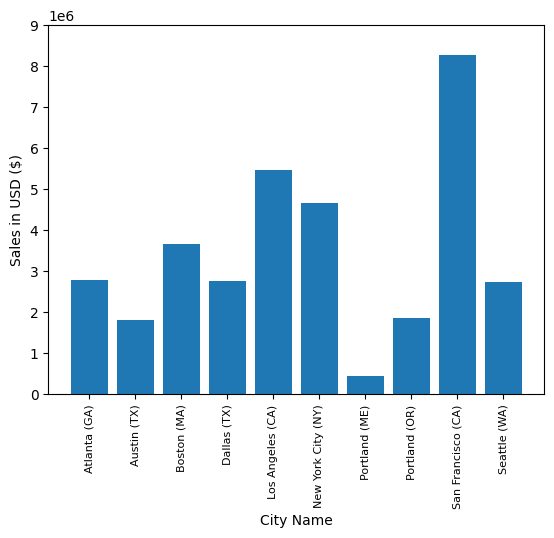

In [115]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities , results['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.xticks(cities, rotation='vertical', size=8)

plt.show()

#### Question 3 - What time should we display advertisements to maximize the likelihood of customer's buying product?

In [28]:
# Convert the 'Order Date' column of the all_data DataFrame to a datetime data type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])



In [31]:
# Create two new columns in the all_data DataFrame called 'Hour' and 'Minute'
# These columns extract the hour and minute values from the 'Order Date' column, respectively, using the 'dt' attribute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute # minute column was created just for fun!

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,4,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,9,27


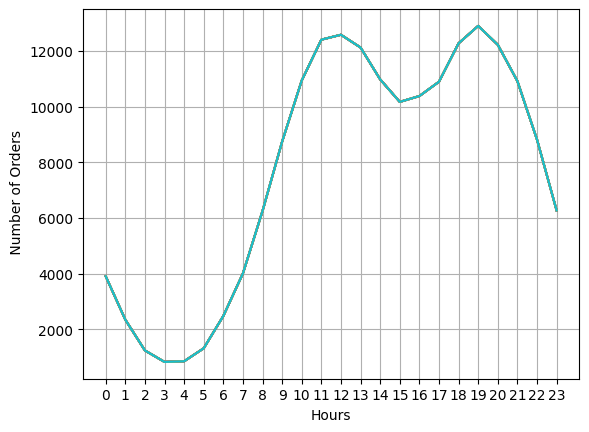

In [38]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel(' Number of Orders')

plt.show()

# My recommendation is around 11am and 6pm

#### Question 4 - What products are most often sold together?

Particularly difficult question

In [45]:
# Filter the all_data DataFrame to keep only the rows where the 'Order ID' column contains duplicated values (i.e. orders with multiple products)
# The 'keep=False' argument means that all occurrences of a duplicated value will be marked as True (not just the first or last occurrence)
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Create a new column called 'Grouped' in the df DataFrame
# This column will contain a comma-separated list of all the products ordered together for each order
# To create this column, we group the rows by 'Order ID' using the 'groupby()' method, and then apply the 'lambda' function to the 'Product' column of each group
# The 'join()' method is used to concatenate the products into a single string separated by commas
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Keep only the 'Order ID' and 'Grouped' columns of the df DataFrame and drop any duplicated rows
df = df[['Order ID', 'Grouped']].drop_duplicates()


df.head()

C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_11348\4061286189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
# Import the 'combinations' and 'Counter' modules from the 'itertools' and 'collections' libraries, respectively
from itertools import combinations
from collections import Counter

# Initialize a Counter object called 'count'
count = Counter()

# Loop through each row in the 'Grouped' column of the 'df' DataFrame
for row in df['Grouped']:
    # Split each row into a list of products
    row_list = row.split(',')
    # Update the 'count' object with a count of all possible combinations of two products in the row list
    count.update(Counter(combinations(row_list, 2)))

    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5 - What product sold the most? Why do you think it sold the most?

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX),23.90,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA),99.99,4,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),600.00,4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),11.99,4,9,27


C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_11348\1946177955.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


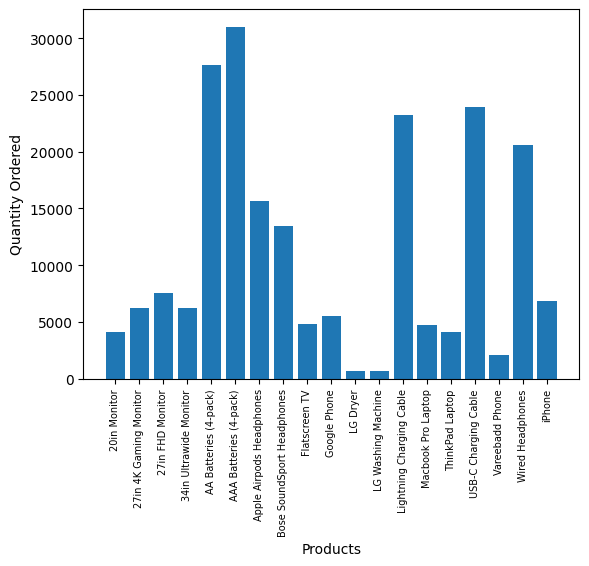

In [75]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 7)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

plt.show()


C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_11348\556570103.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\SANJEEV\AppData\Local\Temp\ipykernel_11348\556570103.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 7)


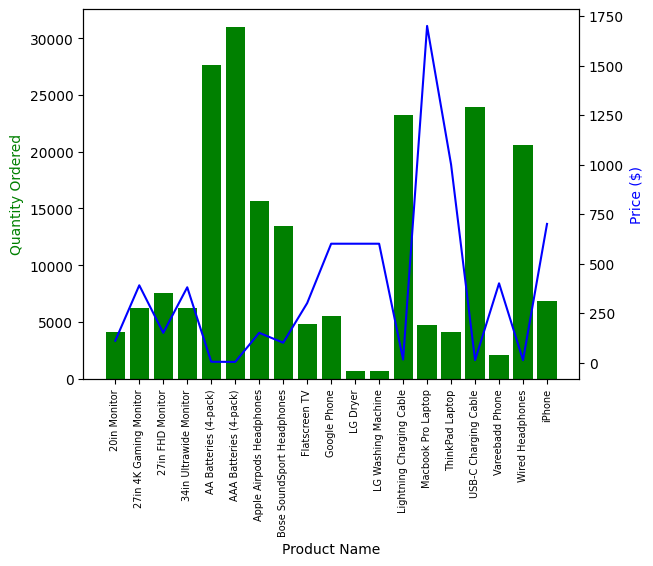

In [73]:
# Finding out co-relation with quantity ordered with price of the item 

# Group the all_data DataFrame by 'Product' and calculate the mean of the 'Price Each' column, and store the result in 'prices'
prices = all_data.groupby('Product').mean()['Price Each']

# Create a new figure and axis object using the 'subplots()' function from matplotlib
fig, ax1 = plt.subplots()

# Create a twin axis object for the second y-axis
ax2 = ax1.twinx()

# Create a bar plot of the quantity of each product ordered, colored green
ax1.bar(products, quantity_ordered, color = 'g')

# Create a line plot of the average price of each product, colored blue
ax2.plot(products, prices, 'b-')

# Set the x-axis label to 'Product Name'
ax1.set_xlabel('Product Name')

# Set the y-axis label for the first axis to 'Quantity Ordered', colored green
ax1.set_ylabel('Quantity Ordered', color = 'g')

# Set the y-axis label for the second axis to 'Price ($)', colored blue
ax2.set_ylabel('Price ($)', color = 'b')

# Rotate the x-axis labels to a vertical orientation and set their font size to 7
ax1.set_xticklabels(products, rotation = 'vertical', size = 7)

plt.show()